In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/MyDrive/ColabNotebooks')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/MyDrive/ColabNotebooks/NextFace

/content/gdrive/MyDrive/ColabNotebooks/NextFace


In [3]:
!pip install flask-ngrok
!pip install flask
!pip install pyngrok
!pip install face_alignment==1.2.0 redner-gpu
!pip install mediapipe
!pip install aspose-3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 761 kB 14.9 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=83ac3b88bbd1a9966fcf4ce2317eaad3ace58fbf4e2d0d165d9dc8b37f6de8c4
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.9 MB 1.2 MB/s 
  Created wheel for face-alignment: filename=face_alignment-1.2.0-py2.py3-none-any.whl size=30416 sha256=ee35367346f57b7563be5741bccfc20d16a5bf038ff80311749d6431fb343a2b
  Stored in directory: /root/.ca

In [4]:
!ngrok authtoken 2IgE3yYKpECC5JehZFVQMzCkqEO_64UJgnaLAFjwZ4h2eWQ6C

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [5]:
from flask import Flask,render_template,request,redirect
from flask_ngrok import run_with_ngrok
import sys
import os
from os.path import join, dirname, realpath
from werkzeug.utils import secure_filename
import cv2
import tensorflow as tf
from keras.preprocessing import image
from keras.models import load_model,model_from_json
import numpy as np
import jinja2
import aspose.threed as a3d
from optimizer import Optimizer
from config import Config
config = Config()
config.fillFromDicFile('/content/gdrive/MyDrive/ColabNotebooks/NextFace/optimConfig.ini')
config.device = 'cuda'
config.path = '/content/gdrive/MyDrive/ColabNotebooks/NextFace/baselMorphableModel/'
UPLOAD_FOLDER = '/content/gdrive/MyDrive/ColabNotebooks/NextFace/static/'

loading optim config from:  /content/gdrive/MyDrive/ColabNotebooks/NextFace/optimConfig.ini


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://a3a8-34-90-24-138.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [11/Dec/2022 13:36:49] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Dec/2022 13:36:49] "GET /index1.css HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [11/Dec/2022 13:36:49] "GET /js/jquery.min.js HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [11/Dec/2022 13:36:50] "GET /js/jquery.validate.min.js HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [11/Dec/2022 13:36:50] "GET /js/popper.js HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [11/Dec/2022 13:36:50] "GET /js/main.js HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [11/Dec/2022 13:36:50] "GET /js/bootstrap.min.js HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [11/Dec/2022 13:36:50] "GET /cdn-cgi/zaraz/s.js?z=JTdCJTIyZXhlY3V0ZWQlMjIlM0ElNUIlNUQlMkMlMjJ0JTIyJTNBJTIyQ29udGFjdCUyMEZvcm0lMjAwNCUyMiUyQyUyMnglMjIlM0EwLjg1MzI3NDQ3NjEwNzkzNjMlMkMlMjJ3JTIyJTNBMTI4MCUyQyUyMmglMjIlM0E3MjAlMkMlMjJqJTIyJTNBNjA5JTJDJTIyZSUyMiUzQTEyODAlMkMlMjJsJTIyJTNBJTIyaHR0cHMlM0ElMkYlMkZwcmV2aWV3LmNvbG9ybGliLmNvbSUyRnRoZW1lJTJGYm9vdHN0cmFwJTJG

1/1 [==============================] - 7s 7s/step
Loading Basel Face Model 2017 from /content/gdrive/MyDrive/ColabNotebooks/NextFace/baselMorphableModel//morphableModel-2017.pickle...
loading mesh normals...
loading uv parametrization...
loading landmarks association file...
creating sampler...


/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


loading image from path:  /content/gdrive/MyDrive/ColabNotebooks/NextFace/static/cropped.jpg
[INFO] resizing input image to fit: 256 px resolution...
detecting landmarks using: mediapipe


/content/gdrive/MyDrive/ColabNotebooks/NextFace/landmarksmediapipe.py:55: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  return torch.tensor(landmarks, device = self.device)
init camera pose...
1/3 => Optimizing head pose and expressions using landmarks...
100%|██████████| 2000/2000 [00:05<00:00, 398.83it/s]
2/3 => Optimizing shape, statistical albedos, expression, head pose and scene light...
100%|██████████| 401/401 [02:06<00:00,  3.17it/s]
3/3 => finetuning albedos, shape, expression, head pose and scene light...
100%|██████████| 101/101 [00:26<00:00,  3.88it/s]
took 2.63 minutes to optimize
saving to: ' /content/gdrive/MyDrive/ColabNotebooks/NextFace/static/output// '. hold on... 
INFO:werkzeug:127.0.0.1 - - [11/Dec/2022 13:41:52] "POST /predict HTTP/1.1" 200 -
INFO:werkze

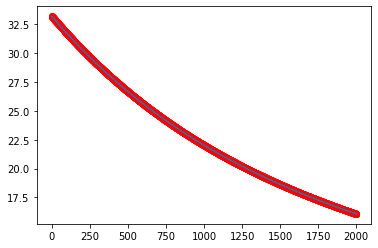

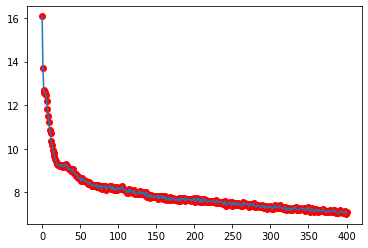

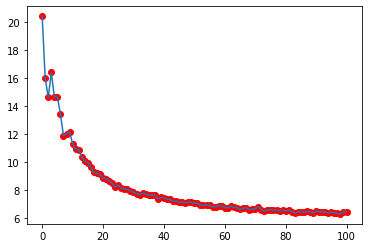

In [6]:
app = Flask(__name__,template_folder='/content/gdrive/MyDrive/ColabNotebooks/NextFace/templates',static_folder='/content/gdrive/MyDrive/ColabNotebooks/NextFace/static')
run_with_ngrok(app)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
app.config['SEND_FILE_MAX_AGE_DEFAULT'] = 1
app.secret_key = 'sameer'
!rm -rf '/content/gdrive/MyDrive/ColabNotebooks/NextFace/static/output/'
@app.route('/')
def main():
    return render_template('index.html')

@app.route('/predict',  methods=['POST', 'GET'])
def uploadFile():
    if request.method == 'POST':
        if 'uploaded-file' not in request.files:
            return render_template('index.html')
        uploaded_img = request.files['uploaded-file']
        if uploaded_img.filename == '':
            return render_template('index.html')
        uploaded_img.save('static/file.jpg')
        img1 = cv2.imread('static/file.jpg')
        gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        faces = cascade.detectMultiScale(gray, 1.1, 3)
        for x,y,w,h in faces:
            cv2.rectangle(img1, (x,y), (x+w, y+h), (0,255,0), 2)
            cropped = img1[y:y+h, x:x+w]
        cv2.imwrite('static/after.jpg', img1)
        try:
            cv2.imwrite('static/cropped.jpg', cropped)
        except:
            pass
        try:
            image = cv2.imread('static/cropped.jpg', 0)
        except:
            image = cv2.imread('static/file.jpg', 0)
        image = tf.keras.utils.load_img('/content/gdrive/MyDrive/ColabNotebooks/NextFace/static/cropped.jpg',target_size = (48,48),color_mode = "grayscale")
        image = np.array(image)
        image = image/255.0
        image = np.reshape(image, (1,48,48,1))
        model = model_from_json(open("emotion_model1.json", "r").read())
        model.load_weights('model.h5')
        prediction = model.predict(image)
        label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}
        prediction = list(prediction[0])
        img_index = prediction.index(max(prediction))
        final_prediction=label_dict[img_index]
        imagePath = '/content/gdrive/MyDrive/ColabNotebooks/NextFace/static/cropped.jpg'
        outputDir = '/content/gdrive/MyDrive/ColabNotebooks/NextFace/static/output/' 
        optimizer = Optimizer(outputDir ,config)
        optimizer.run(imagePath)
        scene=a3d.Scene.from_file("static/output/mesh0.obj")
        scene.save("static/output/result.glTF")
        return render_template('predict.html', data=final_prediction)


@app.route('/contact')
def main2():
    return render_template('contact.html')

@app.route('/about')
def main3():
    return render_template('about.html')

if __name__ == "__main__":
    app.run()